<a href="https://colab.research.google.com/github/setegnworku/DLpipeline/blob/master/Deeplearningassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [6]:
data = pd.read_csv("loan_data.csv")
data.head()



,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Checking null value

In [9]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### Feature and target object type

In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Purpose feaure is catagorical type , thus investigate the distirbution of the catagories

In [11]:
data["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

### Tasks

#### Task 1  Feature Transformation

#### Transform categorical values into numerical values (discrete)

In [12]:
data = pd.get_dummies(data, columns = ["purpose"])
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

#### Task 2
##### Exploratory data analysis of different factors of the dataset. 
###### Descriptive statistics summary for each features

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


### Task 3
#### Additional Feature Engineering

##### I will check the correlation between features and will drop those features which have a strong correlation

##### This will help reduce the number of features and will leave me with the most relevant features

In [15]:

data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,-0.025412,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.124000,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,-0.203103,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,-0.080077,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.125825,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.067184,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,-0.056574,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,-0.067728,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.138535,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.017795,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


### Heatmap is the best to visualize the correlation among features

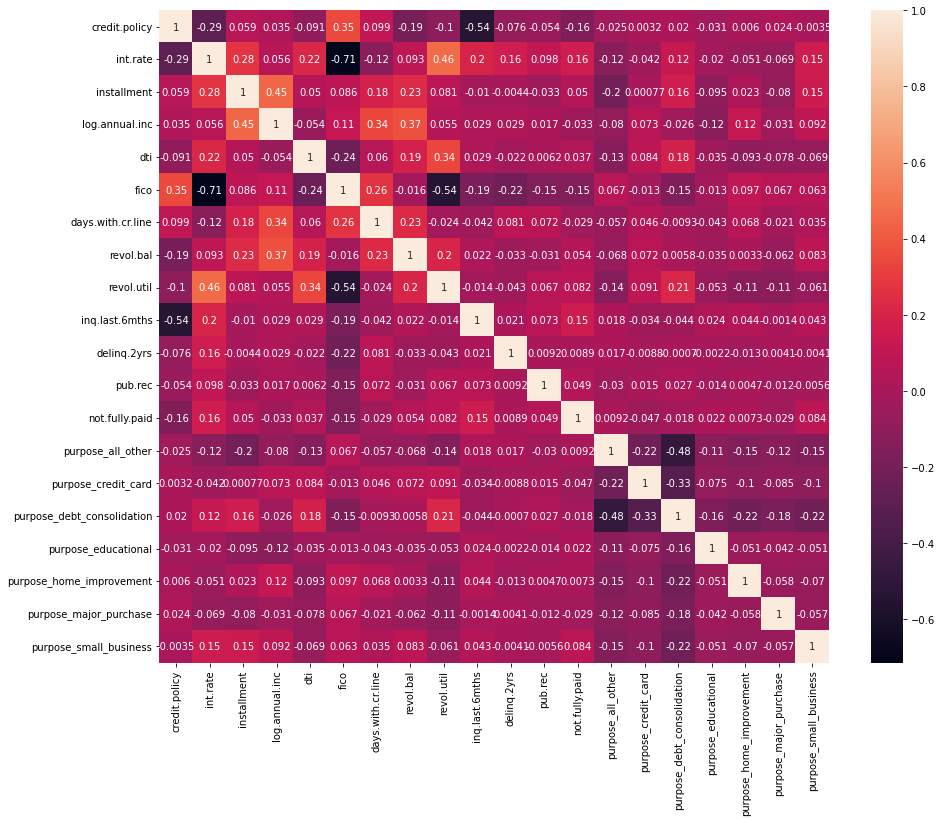

In [16]:
plt.figure(figsize = (15,12))
sns.heatmap(data = data.corr(), annot = True)
plt.show()


##### As can be seen from the correlation heatmaps, we can observe that no two features have positive corelation of more than 0.7 , so we will not remove any feature
###### Thus it is better not to reduce the dimension. I can go directly to split the training and testing population


In [18]:
X = data.drop("not.fully.paid", axis = 1)
y = data["not.fully.paid"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =
0.3, random_state = 4)

##### Heat map for training population ( after splitting)

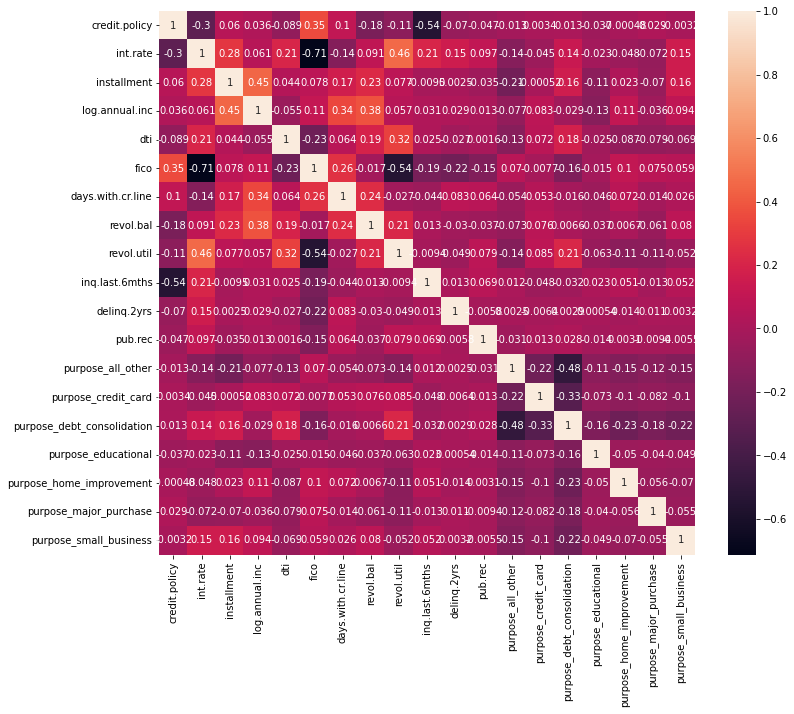

In [19]:
plt.figure(figsize = (12,10))
sns.heatmap(data = X_train.corr(), annot = True)
plt.show()

###### Feature scaling

In [20]:


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape , X_test.shape)

(6704, 19) (2874, 19)


#### Task 4
##### Modeling

###### After applying EDA and feature engineering, I am now ready to build the predictive models

###### In this part, I will create a deep learning model using Keras with Tensorflow backend

In [21]:
## Guidlines 
## Units in the model is always 2 the power of n( 2,4,8,16,32,64) http://localhost:8888/notebooks/Documents/Courses/MLAndAI/Deeplearning/project/Untitled.ipynb#
#### Activation function for the output layer should be sigmoid ( as it is binary two class classfication)

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



In [31]:
model = Sequential()

model.add(Dense(units = 128, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 64, activation = 'tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 32, activation = 'relu'))          
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 1, activation = 'sigmoid'))

In [32]:
es = EarlyStopping(monitor = "accuracy", patience = 4)
model.compile(optimizer = Adam(learning_rate = 0.01),
 loss = 'binary_crossentropy',
 metrics = ['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               2560      
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 64)               

In [34]:
result = model.fit(X_train, y_train,
 validation_data = (X_test, y_test),
 callbacks = [es],
 epochs = 100)


Epoch 1/100
210/210 [==============================] - 2s 4ms/step - loss: 0.4628 - accuracy: 0.8135 - val_loss: 0.4003 - val_accuracy: 0.8497
Epoch 2/100
210/210 [==============================] - 1s 3ms/step - loss: 0.4299 - accuracy: 0.8344 - val_loss: 0.4000 - val_accuracy: 0.8497
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 0.4249 - accuracy: 0.8361 - val_loss: 0.4039 - val_accuracy: 0.8497
Epoch 4/100
210/210 [==============================] - 1s 5ms/step - loss: 0.4207 - accuracy: 0.8353 - val_loss: 0.4014 - val_accuracy: 0.8497
Epoch 5/100
210/210 [==============================] - 1s 5ms/step - loss: 0.4216 - accuracy: 0.8358 - val_loss: 0.4035 - val_accuracy: 0.8497
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 0.4209 - accuracy: 0.8359 - val_loss: 0.3990 - val_accuracy: 0.8497
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 0.4182 - accuracy: 0.8358 - val_loss: 0.4012 - val_accuracy: 0.8497

In [35]:
y_pred = model.predict(X_test) >=0.5

#### Model testing

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)

0.8496868475991649

In [38]:
confusion_matrix(y_pred, y_test)

array([[2442,  432],
       [   0,    0]])

#### Hyperparameter Tunning

In [39]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 8.6 MB/s 


##### Defining ranges of hyperparameters for tuning
###### eg: activation "relu", "tanh"
######    units 32:1040:16( 32 , 32+1*16 , 32 +2*16 .... 1040) for the input layer. 
######           drop out rate 0.1, 0.2, 0.3, 0.4 
            

In [46]:
def build_model_tune(hp):
 model = Sequential()

 model.add(Dense(units = hp.Int('units', min_value = 32, max_value = 128, step = 16),
                                 activation = hp.Choice('actiivation',['relu','tanh']),
                                 input_shape = (X_train.shape[1],)))
 model.add(BatchNormalization())
 model.add(Dropout(hp.Float('rate', min_value = 0.1, max_value = 0.4, step = 0.1), seed = 1234))

 model.add(Dense(units = hp.Int("units", min_value = 32, max_value = 128, step = 16),
                                 activation = hp.Choice("activation", ["relu","tanh"])))
 model.add(BatchNormalization())
 model.add(Dropout(hp.Float("rate",min_value = 0.1, max_value = 0.4, step = 0.1), seed = 1234))

 model.add(Dense(units = hp.Int("units", min_value = 32, max_value = 64, step = 16),
                                 activation = hp.Choice("activation", ["relu","tanh"])))
 model.add(BatchNormalization())
 model.add(Dropout(hp.Float("rate",min_value = 0.1, max_value = 0.4, step = 0.1), seed = 1234))
    
 model.add(Dense(units = 1, activation = "sigmoid"))

 learning_rate = hp.Float("learning_rate", min_value = 0.01, max_value = 0.1, step = 0.01)
 
 model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate),
               loss = "binary_crossentropy",
               metrics = ["accuracy"])
 
 return model


In [47]:
import keras_tuner as kt
build_model_tune(kt.HyperParameters())

In [48]:
rtuner = kt.RandomSearch(hypermodel = build_model_tune,
 objective='val_accuracy',
 max_trials=3,
 executions_per_trial=2,
 overwrite=True,
 directory='my_dir',
 project_name='Deeplearning')

### Tuning the parameters

In [49]:
rtuner.search(X_train, y_train, epochs=5, validation_data=(X_test,
y_test))

Trial 3 Complete [00h 00m 13s]
val_accuracy: 0.8502087593078613

Best val_accuracy So Far: 0.8502087593078613
Total elapsed time: 00h 00m 50s


In [50]:

models = rtuner.get_best_models(num_models=2)
models[1].summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [51]:
y_predh = models[1].predict(X_test) >=0.5
accuracy_score(y_predh, y_test)

0.8503827418232429